#### Evaluating the Landscape of the Tox21 set as a 2D projection and layering on the activities

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl
%matplotlib inline

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP + 'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'


In [3]:
df = pd.read_csv(processed_dir+'TxPs_hitcall_190822.csv')

In [4]:
df = df.set_index('dsstox_substance_id')

In [5]:
df

,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,bond:C#N_cyano_cyanohydrin,...,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene,chnm,casn,hitc
dsstox_substance_id,,,,,,,,,,,,,,,,,,,,,
DTXSID1045081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8-Quinolinol salicylic acid (1:1),2439-07-8,0
DTXSID6025513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Malachite green oxalate,2437-29-8,1
DTXSID8026727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"(2E)-3,7-Dimethyl-2,6-octadien-1-ol",106-24-1,1
DTXSID8022408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Phenol red,143-74-8,1
DTXSID1045083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Aminoquinuride dihydrochloride,5424-37-3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID4032611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Ethoprop,13194-48-4,0
DTXSID3031864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Perfluorooctanesulfonic acid,1763-23-1,1
DTXSID5020607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Di(2-ethylhexyl) phthalate,117-81-7,1


In [6]:
y = df['hitc']

In [7]:
y

dsstox_substance_id
DTXSID1045081    0
DTXSID6025513    1
DTXSID8026727    1
DTXSID8022408    1
DTXSID1045083    0
                ..
DTXSID4032611    0
DTXSID3031864    1
DTXSID5020607    1
DTXSID8024109    0
DTXSID0032520    1
Name: hitc, Length: 7532, dtype: int64

In [8]:
from sklearn.manifold import TSNE

In [9]:
X = df.iloc[:,:-3]

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7532 entries, DTXSID1045081 to DTXSID0032520
Columns: 729 entries, atom:element_main_group to ring:polycycle_tricyclo_benzvalene
dtypes: int64(729)
memory usage: 42.2+ MB


In [11]:
X.isnull().sum().sum()

0

In [12]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='pca').fit_transform(X)

/home/grace/anaconda3/envs/aim_clone/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [13]:
X_embedded

array([[ 18.425714 , -14.793627 ],
       [  1.0475826,  21.112307 ],
       [-64.89154  ,  19.931725 ],
       ...,
       [ 39.344173 ,  28.91473  ],
       [ 44.42837  , -52.464542 ],
       [ 22.56435  ,  31.778252 ]], dtype=float32)

In [14]:
tsne_df = pd.DataFrame(X_embedded)
tsne_df.columns = ['X', 'Y']
tsne_df.index = X.index

In [15]:
tsne_df = pd.concat([tsne_df, df.iloc[:,-1]], axis = 1)

In [16]:
tsne_df.hitc.value_counts()

0    5347
1    2185
Name: hitc, dtype: int64

In [17]:
tsne_df[tsne_df.hitc == 1]

,X,Y,hitc
dsstox_substance_id,,,
DTXSID6025513,1.047583,21.112307,1
DTXSID8026727,-64.891541,19.931725,1
DTXSID8022408,81.040955,15.117132,1
DTXSID6045084,-36.259464,13.974792,1
DTXSID1045085,-4.216869,1.678693,1
...,...,...,...
DTXSID8035180,-20.392513,75.226372,1
DTXSID8024238,-4.553946,19.158880,1
DTXSID3031864,-35.042507,-76.877312,1


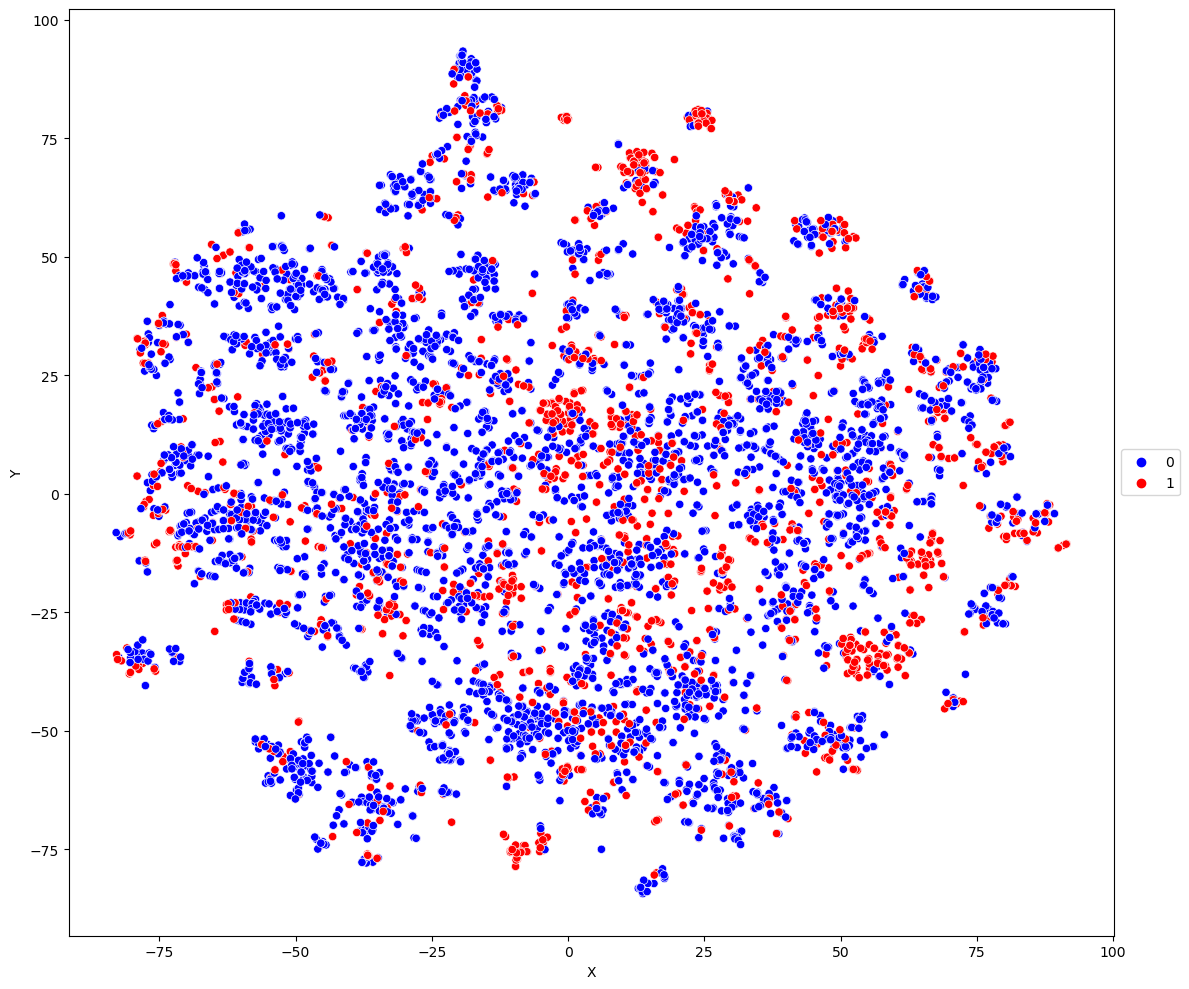

In [18]:
plt.figure(figsize = (12,10))
color_dict = dict({1: 'red', 0: 'blue'})
ax = sns.scatterplot(x = 'X', y = 'Y' , hue = 'hitc',  palette = color_dict, data = tsne_df)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig(figures_dir+'TSNE_landscapes_tagged_190822.png', dpi = 300)


In [19]:
perplexities = [5, 30, 50, 100]
red = y == 0
green = y == 1

/home/grace/anaconda3/envs/aim_clone/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/grace/anaconda3/envs/aim_clone/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/grace/anaconda3/envs/aim_clone/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/grace/anaconda3/envs/aim_clone/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 

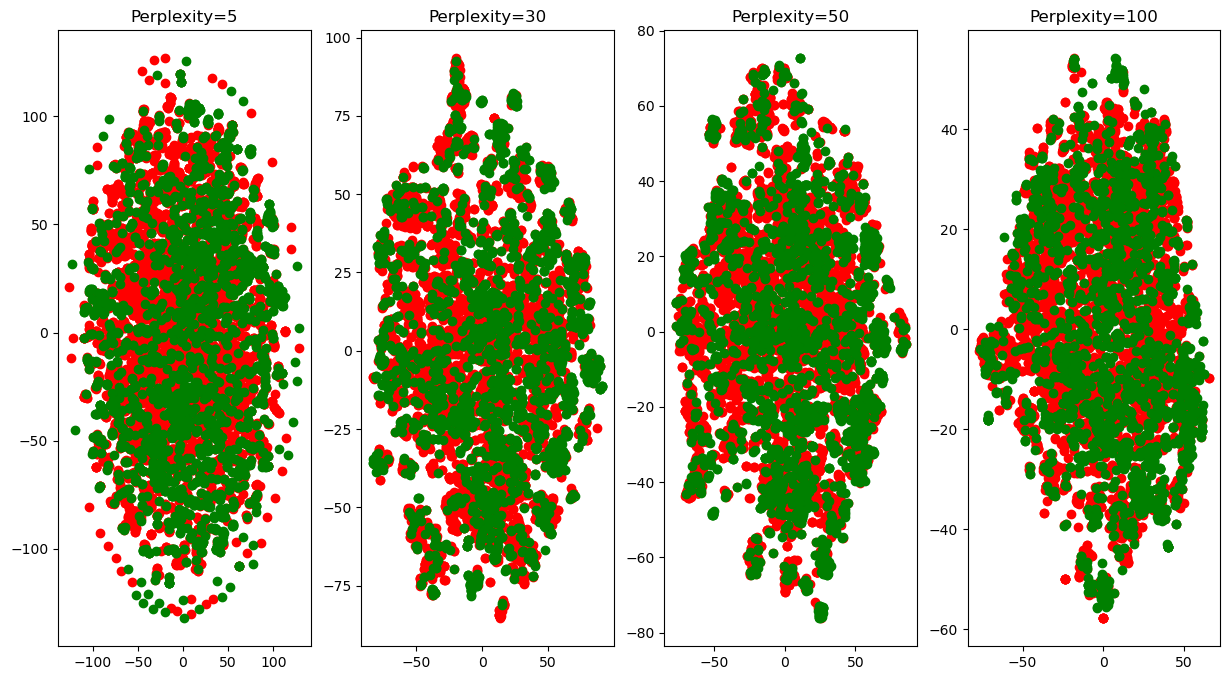

In [22]:
(fig, subplots) = plt.subplots(1, 4, figsize=(15, 8))
for i, perplexity in enumerate(perplexities):
    ax = subplots[i]
    tsne = TSNE(
        n_components=2,
        init="pca",
        random_state=42,
        perplexity=perplexity,
        learning_rate = "auto"
       
    )
    X_embedded = tsne.fit_transform(X)
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(X_embedded[red, 0], X_embedded[red, 1], c="r")
    ax.scatter(X_embedded[green, 0], X_embedded[green, 1], c="g")

In [15]:
from ugtm import eGTM,eGTR
import altair as alt

In [16]:
gtm_means = eGTM(m=2, model="means").fit_transform(X)
gtm_modes = eGTM(m=2, model="modes").fit_transform(X)

In [17]:
gtm_means

array([[ 0.59999653,  0.06667739],
       [ 0.73330524,  0.06658459],
       [-0.86664665,  0.10026658],
       ...,
       [-0.33322605,  0.73333302],
       [ 0.59999647, -0.06663611],
       [ 0.46565933, -0.03624524]])

In [18]:
dgtm_modes = pd.DataFrame(gtm_modes, columns=["x1", "x2"])
dgtm_modes["label"] = y



In [19]:
dgtm_means = pd.DataFrame(gtm_means, columns=["x1", "x2"])




In [20]:
dgtm_means
dgtm_means.index = X.index
dgtm_means = pd.concat([dgtm_means, df.iloc[:,-1]], axis = 1)
dgtm_means

,x1,x2,hitc
dsstox_substance_id,,,
DTXSID1045081,0.599997,0.066677,0
DTXSID6025513,0.733305,0.066585,1
DTXSID8026727,-0.866647,0.100267,1
DTXSID8022408,-0.255933,-0.531974,1
DTXSID1045083,0.465916,0.467417,0
...,...,...,...
DTXSID4032611,-0.866499,0.066806,0
DTXSID3031864,-0.597031,-0.203624,1
DTXSID5020607,-0.333226,0.733333,1


In [21]:
dgtm_modes
dgtm_modes.index = X.index
dgtm_modes = pd.concat([dgtm_modes, df.iloc[:,-1]], axis = 1)

In [22]:
dgtm_modes = dgtm_modes.drop('label', axis = 1)

<AxesSubplot:xlabel='x1', ylabel='x2'>

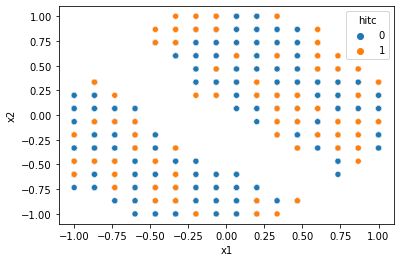

In [23]:
#sns.hexplot(x = 'x1', y = 'x2', data = dgtm_modes, hue = 'hitc')
sns.scatterplot(x=dgtm_modes['x1'], y=dgtm_modes['x2'],  hue=dgtm_modes['hitc'])

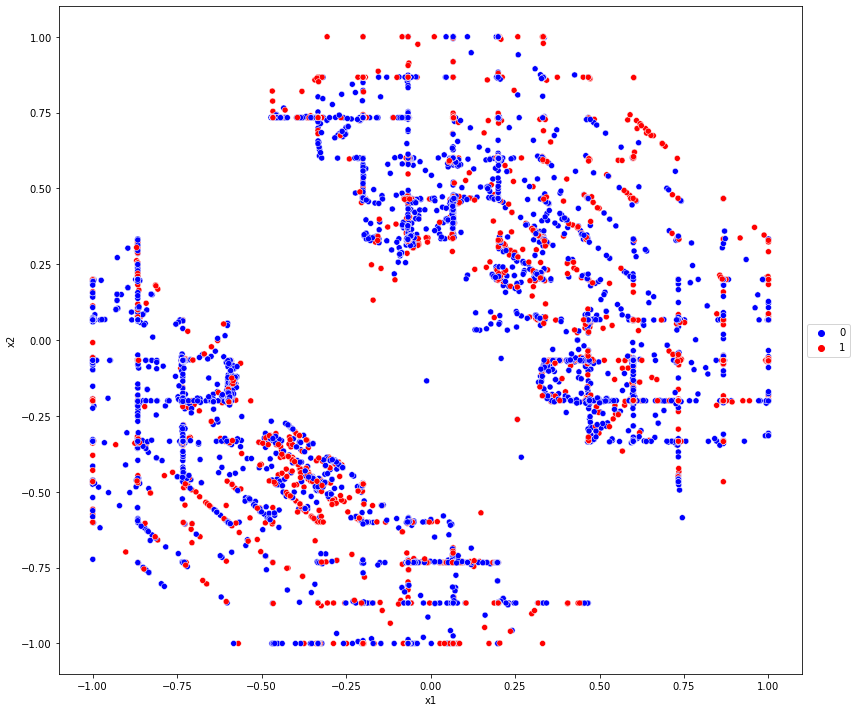

In [24]:
plt.figure(figsize = (12,10))
ax = sns.scatterplot(x=dgtm_means['x1'], y=dgtm_means['x2'],  hue=dgtm_means['hitc'], palette = color_dict)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(figures_dir+'GTM_landscapes_tagged_190822.png', dpi = 300)

#### Calculate Classify features and use them as BitVectors in an exploration of the Chemical Landscape

In [67]:
classify = pd.read_csv(processed_dir+"classify_msti.csv")

In [69]:
classify
classify['subclass2'] = classify[['class', 'subclass']].apply(lambda x: x['class'] if pd.isnull(x['subclass']) else x['subclass'], axis = 1)

<AxesSubplot:>

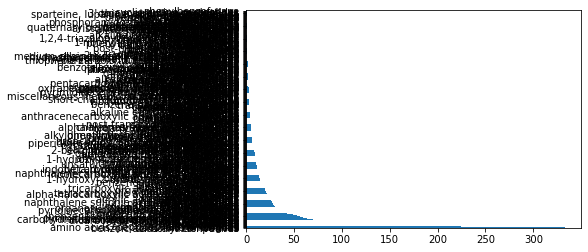

In [109]:
classify[~classify['class'].isnull()]['subclass'].value_counts().plot.barh()

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

XC = enc.fit_transform(classify['subclass2'].dropna().values.reshape(-1, 1) )

In [73]:
XC.shape

(7487, 613)

In [74]:
len(enc.get_feature_names())

/home/grace/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


613

In [75]:
C_df = pd.DataFrame(XC)

In [76]:
C_df.columns = enc.get_feature_names()

In [77]:
classify.dropna(subset = ['subclass2'], axis =0)['dtxsid']

0       DTXSID3048659
1       DTXSID9044661
2       DTXSID6047523
3       DTXSID6023608
4       DTXSID9041237
            ...      
7495    DTXSID0020365
7496    DTXSID3045433
7497    DTXSID5048421
7498    DTXSID5023295
7499    DTXSID4024773
Name: dtxsid, Length: 7487, dtype: object

In [78]:
C_df.index = classify.dropna(subset = ['subclass2'], axis =0)['dtxsid']

In [79]:
C_df

,"x0_1,1'-azonaphthalenes","x0_1,2,4-triazines","x0_1,2,4-triazolopyrimidine-2-sulfonamides","x0_1,3,5-triazinanes","x0_1,3,5-triazines","x0_1,3-dioxanes","x0_1,3-dioxolanes","x0_1,3-isoquinolinediones","x0_1,4-benzodiazepines","x0_1,4-dioxanes",...,x0_unsaturated aliphatic hydrocarbons,x0_ureas,x0_vinca alkaloids,x0_vinyl chlorides,x0_vinyl iodides,x0_vinylogous acids,x0_vitamin d and derivatives,x0_xylenes,x0_yohimbine alkaloids,x0_zearalenones
dtxsid,,,,,,,,,,,,,,,,,,,,,
DTXSID3048659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID9044661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID6047523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID6023608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID9041237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID0020365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID3045433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID5048421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
gtm_means_1 = eGTM(m=2, model="means").fit_transform(C_df)

In [81]:
dgtm_means_1 = pd.DataFrame(gtm_means_1, columns=["x1", "x2"])

In [83]:
dgtm_means_1.index = C_df.index

In [84]:
dgtm_means_1

,x1,x2
dtxsid,,
DTXSID3048659,0.200164,-0.333167
DTXSID9044661,0.200166,-0.333165
DTXSID6047523,0.200175,-0.333159
DTXSID6023608,0.200182,-0.333154
DTXSID9041237,0.329936,-0.336317
...,...,...
DTXSID0020365,0.200162,-0.333168
DTXSID3045433,0.870519,0.994652
DTXSID5048421,0.200162,-0.333168


In [95]:
ids = df.index.intersection(dgtm_means_1.index)

In [100]:
df.loc[ids, 'hitc']

DTXSID1045081    0
DTXSID6025513    1
DTXSID8026727    1
DTXSID8022408    1
DTXSID1045083    0
                ..
DTXSID4032611    0
DTXSID3031864    1
DTXSID5020607    1
DTXSID8024109    0
DTXSID0032520    1
Name: hitc, Length: 7487, dtype: int64

In [102]:
gtm_means_1_df = pd.concat([dgtm_means_1.loc[ids], df.loc[ids, 'hitc']], axis = 1)

In [104]:
gtm_means_1_df

,x1,x2,hitc
DTXSID1045081,0.200163,-0.333168,0
DTXSID6025513,-0.063968,-0.201367,1
DTXSID8026727,0.329936,-0.336317,1
DTXSID8022408,0.200166,-0.333165,1
DTXSID1045083,0.200164,-0.333166,0
...,...,...,...
DTXSID4032611,0.200163,-0.333167,0
DTXSID3031864,0.200166,-0.333165,1
DTXSID5020607,0.870519,0.994652,1
DTXSID8024109,0.200185,-0.333152,0


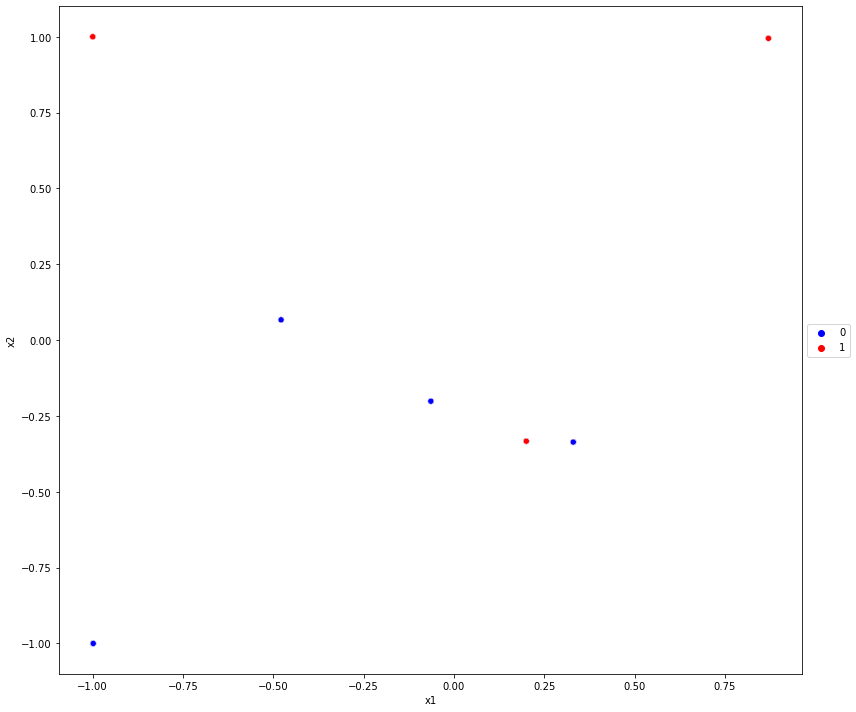

In [103]:
plt.figure(figsize = (12,10))
ax = sns.scatterplot(x=gtm_means_1_df['x1'], y=gtm_means_1_df['x2'],  hue=gtm_means_1_df['hitc'], palette = color_dict)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#plt.savefig(figures_dir+'GTM_landscapes_tagged_200422.png', dpi = 300)